In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("D:/Tiger/Dataset.csv")
test = pd.read_csv("D:/Tiger/Test.csv")

In [4]:
print(dataset.shape)

(15388, 41)


In [5]:
dataset.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Time_since_most_recent_outstandi,PPI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,0,0,0,0,9,10,1,18,16,0
1,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,1,1,0,0,5,0,0,229,99,1
2,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,0,0,0,0,1,13,0,38,99,1
3,8,913,A,120,33000.0,9.4,secured,59,11,18,...,0,0,0,0,1,1,0,525,99,1
4,9,840,B,60,8000.0,15.9,UnSecured,12,2,293,...,11,1,1,0,1,21,0,120,99,1


In [6]:
dataset.isnull().sum()

Ref                                 0
Credit_Score                        0
Final_Grade                         0
Term                                0
Net_Advance                         0
APR                                 0
Loan_Type                           0
Mosaic                              0
Mosaic_Class                        0
Time_at_Address                     0
Residential_Status                  0
Number_of_Dependants                0
Marital_Status                      0
Gender                              0
Time_in_Employment                  0
Employment_Status                   0
Income_Range                        0
ACCESS_Card                         0
VISA_Card                           0
Other_Credit_Store_Card             0
Time_with_Bank                      0
Value_of_Property                   0
Outstanding_Mortgage_Bal            0
Total_Outstanding_Balances          0
Bureau_Data___Monthly_Other_Co_R    0
Worst_History_CT                    0
Age         

In [7]:
print(dataset.Age.min())
print(dataset.Age.max())

19
77


In [8]:
bins= [19,26,66,100]
labels = ['Young','Adult','SeniorCitizen']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

In [9]:
dataset1=dataset.drop(['Age'], axis = 1)

In [10]:
for col in ['AgeGroup']:
    dataset1[col]= dataset1[col].astype('object')

In [11]:
dataset1.dtypes

Ref                                   int64
Credit_Score                          int64
Final_Grade                          object
Term                                  int64
Net_Advance                         float64
APR                                 float64
Loan_Type                            object
Mosaic                                int64
Mosaic_Class                          int64
Time_at_Address                       int64
Residential_Status                   object
Number_of_Dependants                  int64
Marital_Status                       object
Gender                               object
Time_in_Employment                    int64
Employment_Status                    object
Income_Range                          int64
ACCESS_Card                          object
VISA_Card                            object
Other_Credit_Store_Card              object
Time_with_Bank                        int64
Value_of_Property                     int64
Outstanding_Mortgage_Bal        

In [12]:
# list of numerical variables
numerical_features = [feature for feature in dataset1.columns if dataset1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset1[numerical_features].head()

Number of numerical variables:  31


,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,...,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Time_since_most_recent_outstandi,PPI
0,1,918,36,3000.0,14.4,46,8,132,0,288,...,0,0,0,0,9,10,1,18,16,0
1,6,839,60,8000.0,16.9,47,8,48,0,82,...,1,1,0,0,5,0,0,229,99,1
2,7,1057,60,7650.0,7.4,55,10,156,2,342,...,0,0,0,0,1,13,0,38,99,1
3,8,913,120,33000.0,9.4,59,11,18,0,170,...,0,0,0,0,1,1,0,525,99,1
4,9,840,60,8000.0,15.9,12,2,293,0,77,...,11,1,1,0,1,21,0,120,99,1


In [13]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset1[feature].unique())<25 and feature not in ['Ref']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 11


In [14]:
dataset1[discrete_feature].head()

,Mosaic_Class,Number_of_Dependants,Income_Range,Worst_History_CT,Total___Public_Info___CCJ____ban,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Total___outstanding_CCJ_s,PPI
0,8,0,6,5,1,0,0,0,9,1,0
1,8,0,6,5,0,1,0,0,5,0,1
2,10,2,6,0,0,0,0,0,1,0,1
3,11,0,6,0,0,0,0,0,1,0,1
4,2,0,6,0,0,1,1,0,1,0,1


In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Ref']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


In [16]:
categorical_features=[feature for feature in dataset1.columns if dataset1[feature].dtypes=='O'and feature not in ['Ref']]
categorical_features

['Final_Grade',
 'Loan_Type',
 'Residential_Status',
 'Marital_Status',
 'Gender',
 'Employment_Status',
 'ACCESS_Card',
 'VISA_Card',
 'Other_Credit_Store_Card',
 'AgeGroup']

In [17]:
dataset1[categorical_features].head()

,Final_Grade,Loan_Type,Residential_Status,Marital_Status,Gender,Employment_Status,ACCESS_Card,VISA_Card,Other_Credit_Store_Card,AgeGroup
0,A,UnSecured,H,M,M,S,FALSE,FALSE,TRUE,Adult
1,B,UnSecured,R,M,M,G,FALSE,TRUE,FALSE,Adult
2,X,UnSecured,H,M,M,S,TRUE,FALSE,FALSE,Adult
3,A,secured,H,M,M,P,FALSE,TRUE,FALSE,Adult
4,B,UnSecured,H,M,M,P,TRUE,TRUE,FALSE,Adult


In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset1[feature].unique())))

The feature is Final_Grade and number of categories are 10
The feature is Loan_Type and number of categories are 2
The feature is Residential_Status and number of categories are 4
The feature is Marital_Status and number of categories are 4
The feature is Gender and number of categories are 2
The feature is Employment_Status and number of categories are 9
The feature is ACCESS_Card and number of categories are 2
The feature is VISA_Card and number of categories are 2
The feature is Other_Credit_Store_Card and number of categories are 2
The feature is AgeGroup and number of categories are 3


# Exploratory Data Analysis and Data Preprocessing

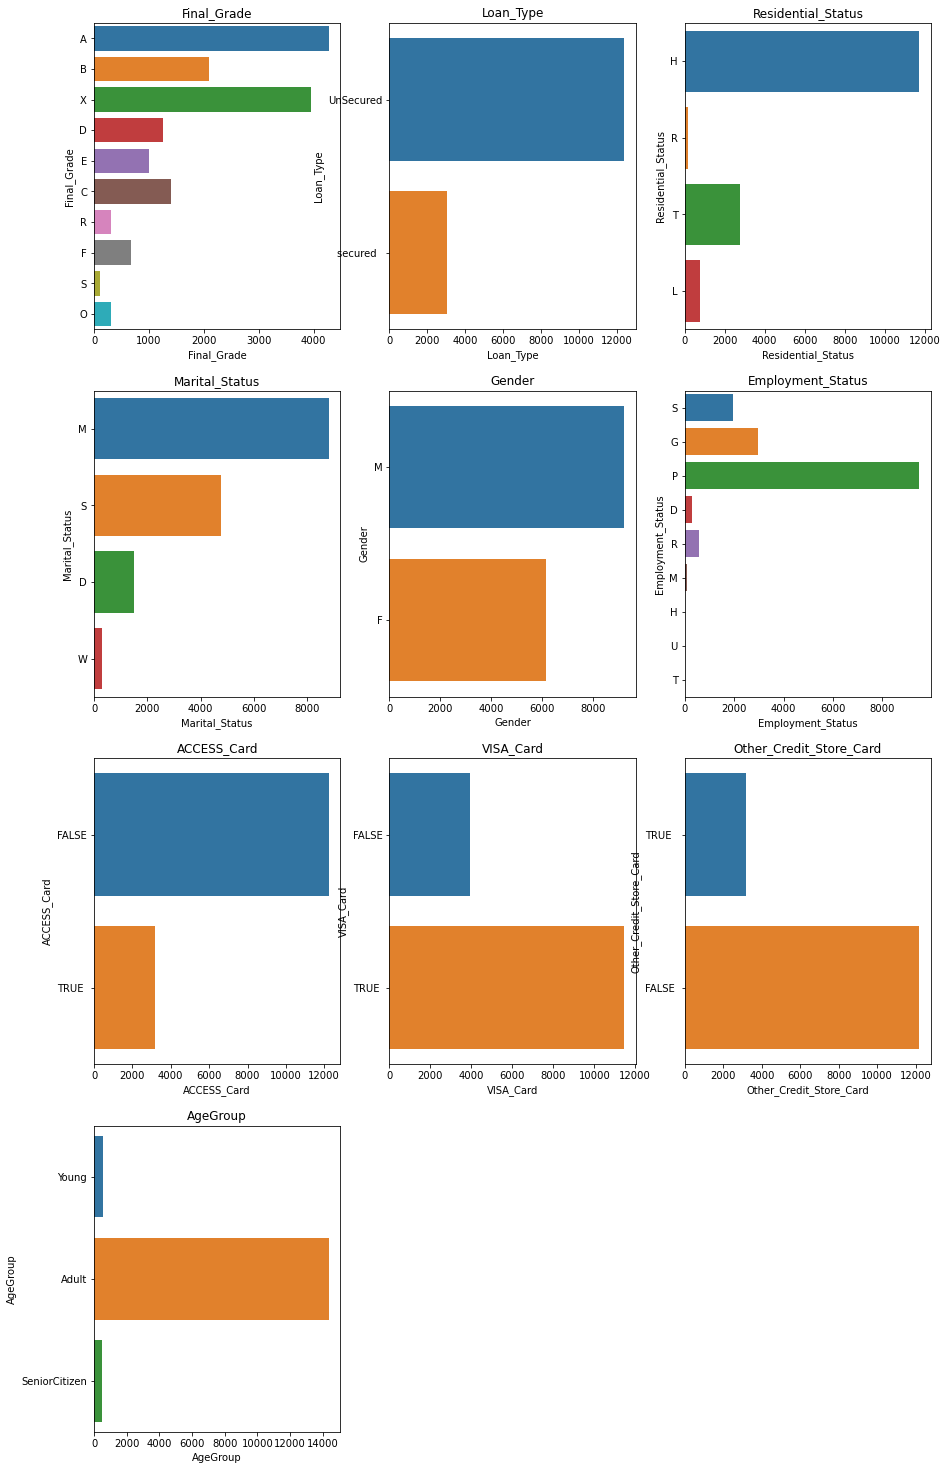

In [19]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features :
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=dataset)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

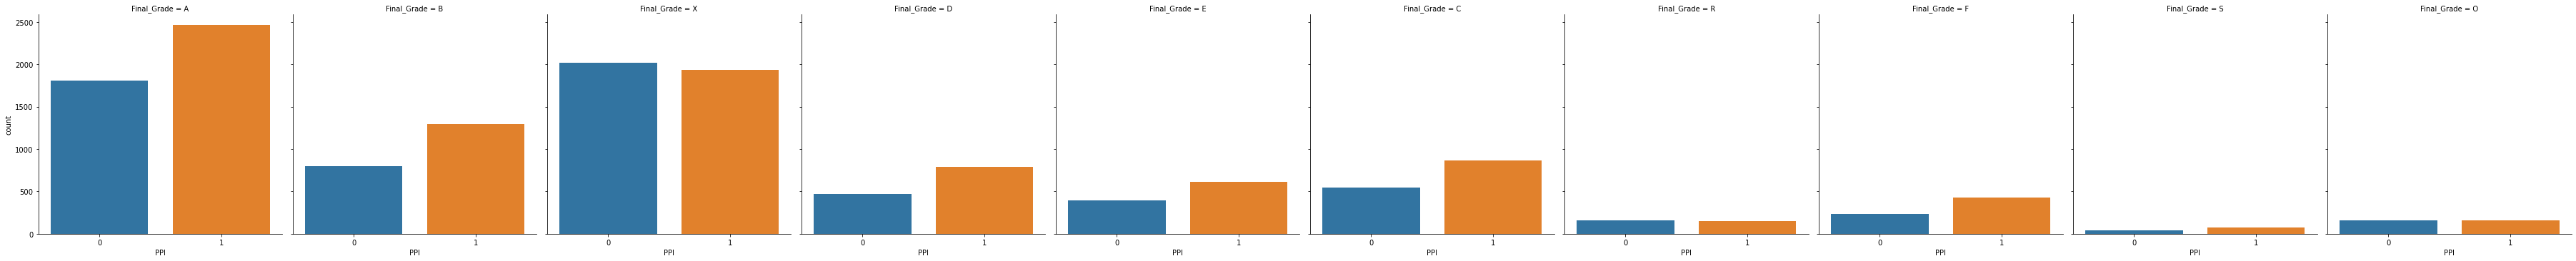

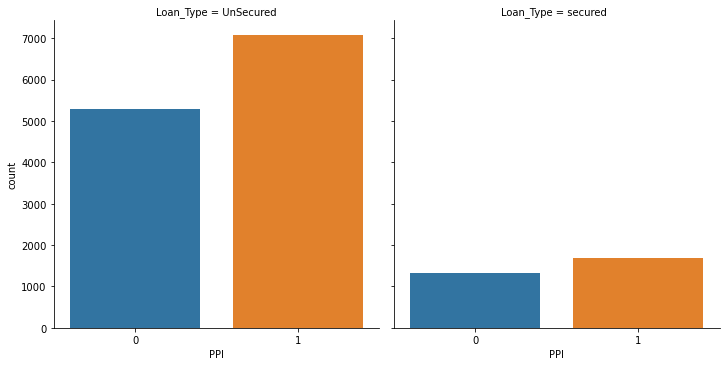

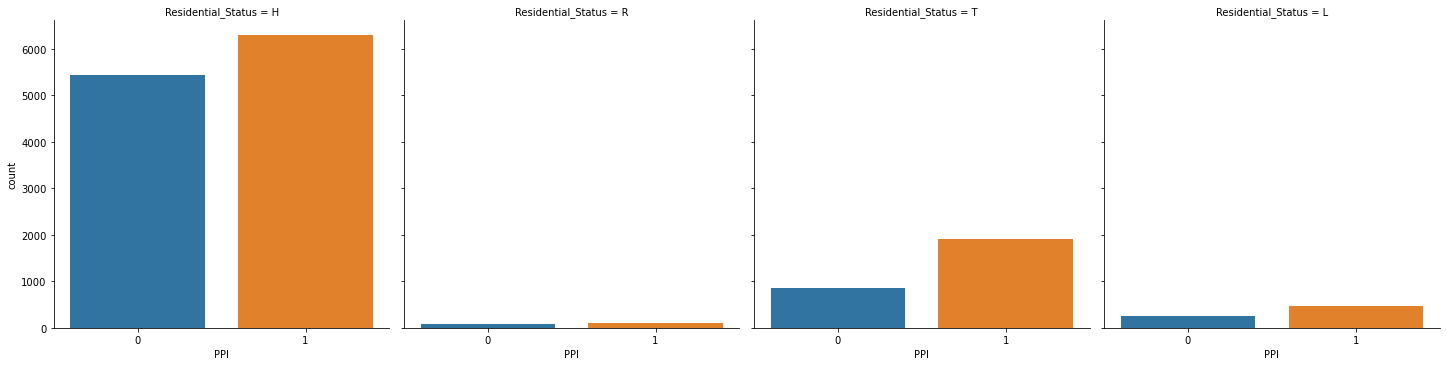

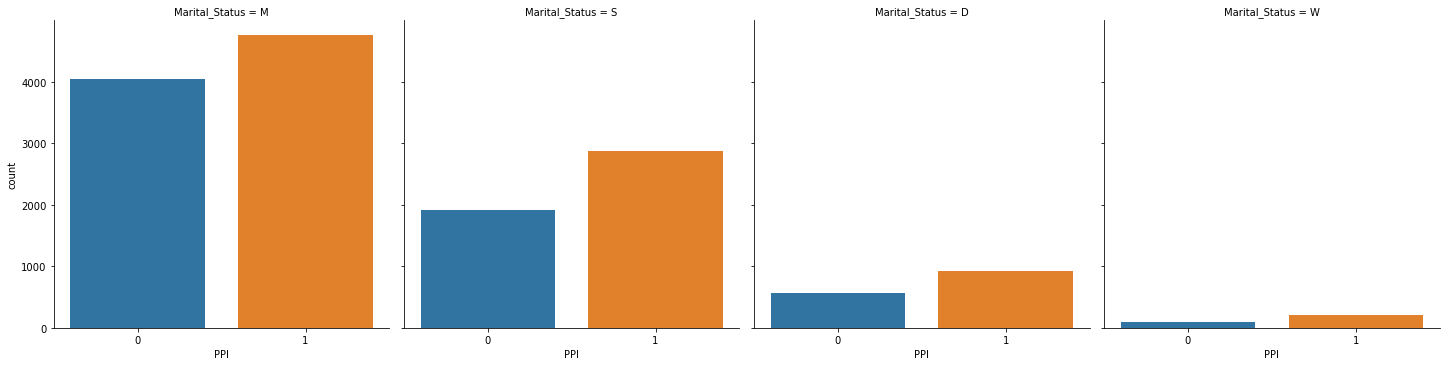

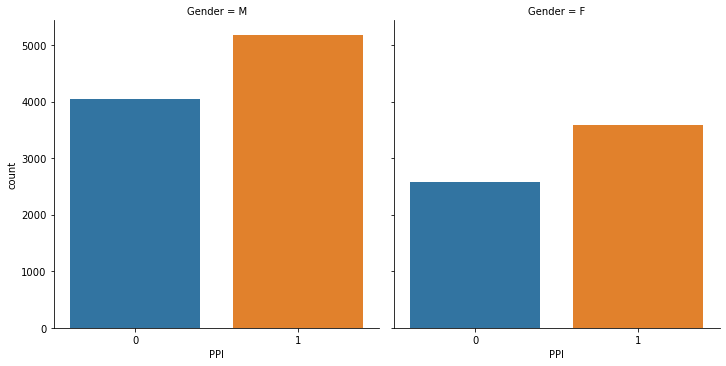

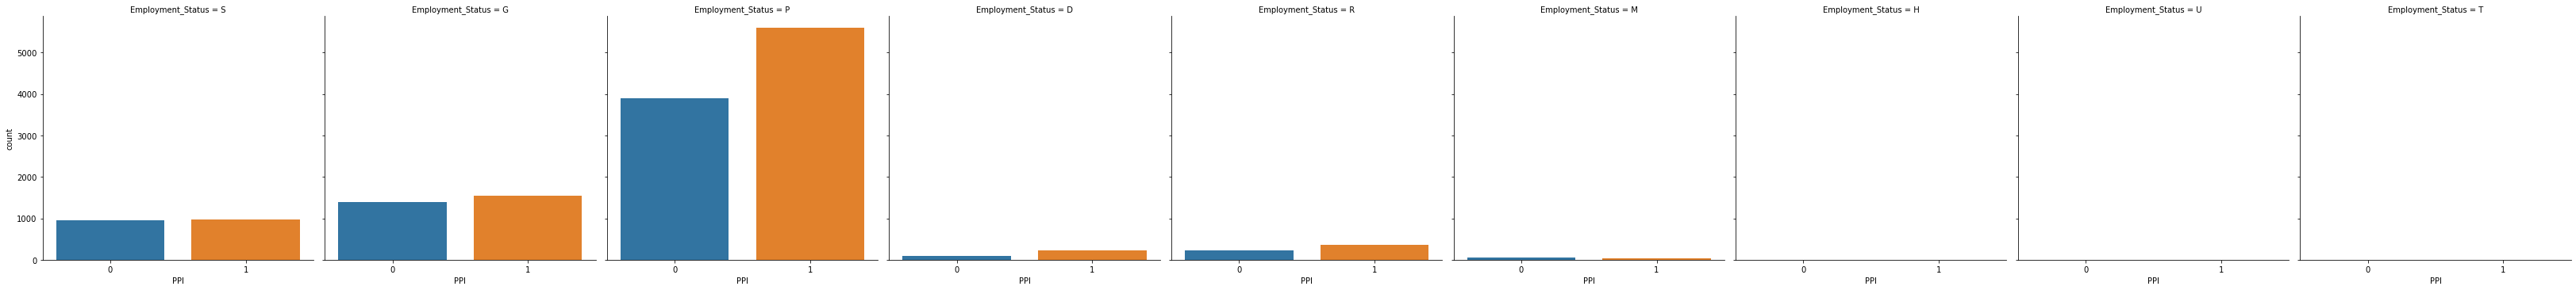

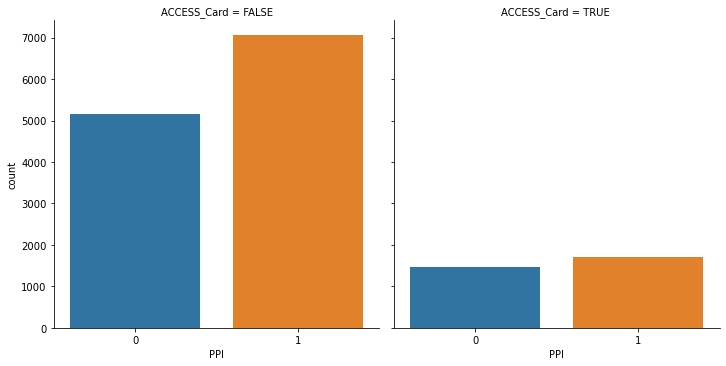

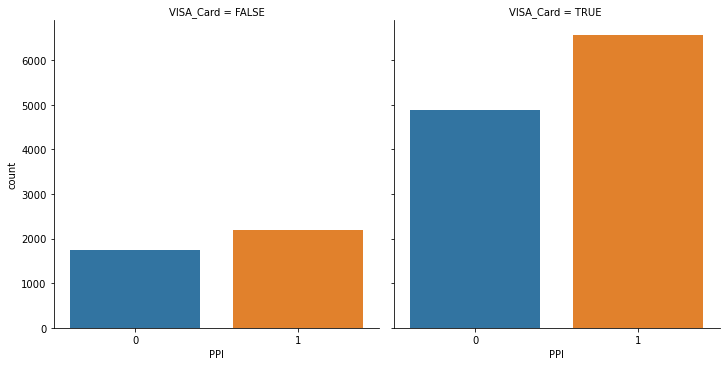

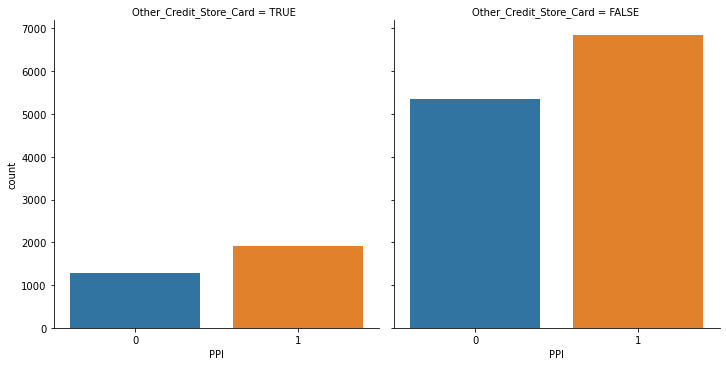

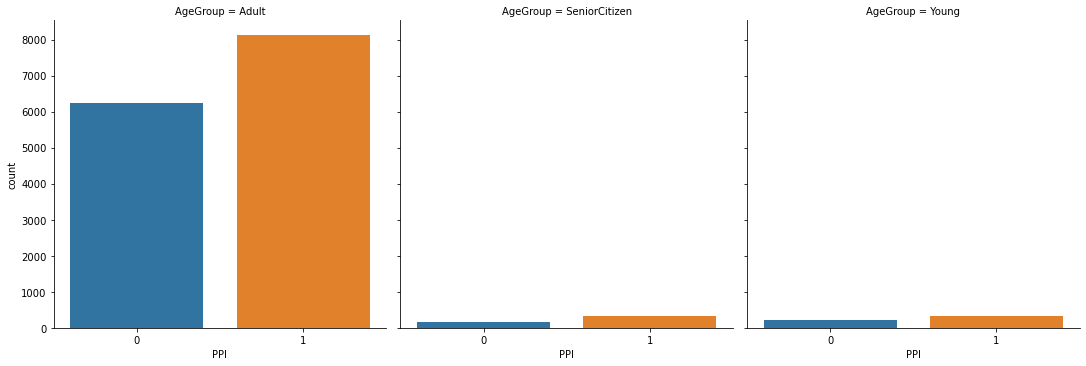

In [20]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='PPI', col=categorical_feature, kind='count', data= dataset1)
plt.show()

In [21]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(dataset1.groupby(['PPI',categorical_feature]).size())

PPI  Final_Grade
0    A              1809
     B               798
     C               546
     D               469
     E               392
     F               237
     O               161
     R               155
     S                37
     X              2021
1    A              2464
     B              1295
     C               865
     D               789
     E               611
     F               431
     O               155
     R               146
     S                75
     X              1932
dtype: int64
PPI  Loan_Type
0    UnSecured    5295
     secured      1330
1    UnSecured    7078
     secured      1685
dtype: int64
PPI  Residential_Status
0    H                     5444
     L                      260
     R                       72
     T                      849
1    H                     6296
     L                      472
     R                       95
     T                     1900
dtype: int64
PPI  Marital_Status
0    D                  573
     M   

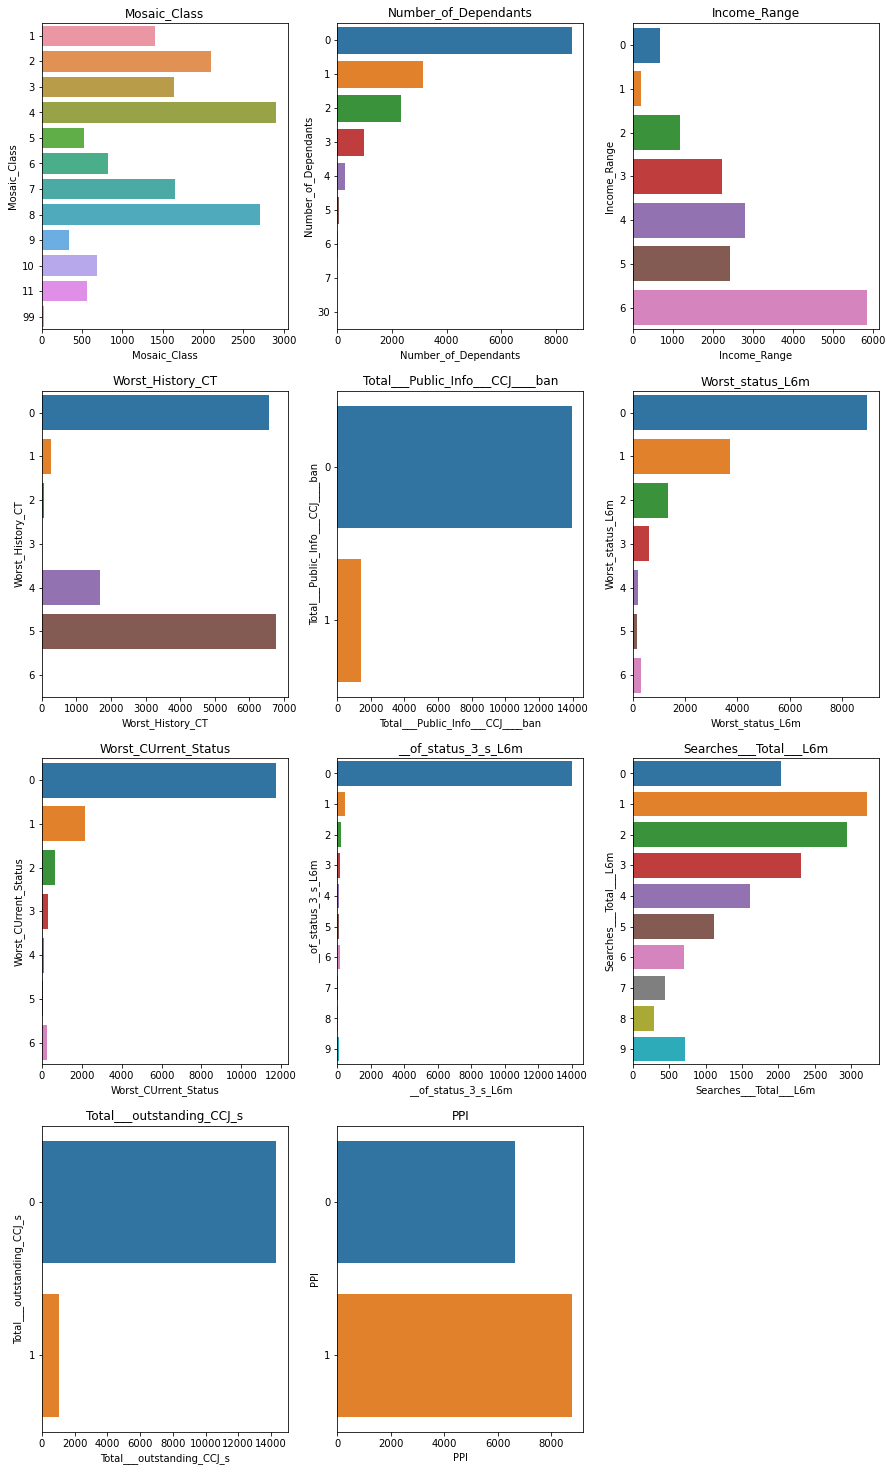

In [22]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in discrete_feature :
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=feature,data=dataset1)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='PPI', ylabel='count'>

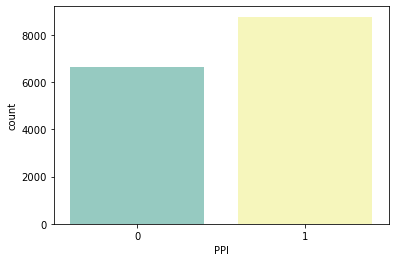

In [23]:
#Class imbalance problem is not present in the dataset
sns.countplot(x = 'PPI', data = dataset1, palette = 'Set3')

In [24]:
new_train = pd.get_dummies(dataset1,columns = ['Final_Grade','Loan_Type','Residential_Status','Marital_Status','Gender','Employment_Status','ACCESS_Card','VISA_Card','Other_Credit_Store_Card','AgeGroup'], drop_first = True)
new_train.head()

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,...,Employment_Status_P,Employment_Status_R,Employment_Status_S,Employment_Status_T,Employment_Status_U,ACCESS_Card_TRUE,VISA_Card_TRUE,Other_Credit_Store_Card_TRUE,AgeGroup_SeniorCitizen,AgeGroup_Young
0,1,918,36,3000.0,14.4,46,8,132,0,288,...,0,0,1,0,0,0,0,1,0,0
1,6,839,60,8000.0,16.9,47,8,48,0,82,...,0,0,0,0,0,0,1,0,0,0
2,7,1057,60,7650.0,7.4,55,10,156,2,342,...,0,0,1,0,0,1,0,0,0,0
3,8,913,120,33000.0,9.4,59,11,18,0,170,...,1,0,0,0,0,0,1,0,0,0
4,9,840,60,8000.0,15.9,12,2,293,0,77,...,1,0,0,0,0,1,1,0,0,0


In [25]:
new_train.drop(columns = ["Ref"],inplace = True)

In [26]:
new_train.describe()

,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,...,Employment_Status_P,Employment_Status_R,Employment_Status_S,Employment_Status_T,Employment_Status_U,ACCESS_Card_TRUE,VISA_Card_TRUE,Other_Credit_Store_Card_TRUE,AgeGroup_SeniorCitizen,AgeGroup_Young
count,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,...,15388.000000,15388.000000,15388.000000,15388.00000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000,15388.000000
mean,883.973551,58.744931,7348.044652,18.577476,29.347414,5.343125,119.349558,0.801924,103.287497,4.401547,...,0.617624,0.038082,0.125552,0.00013,0.000325,0.205745,0.743826,0.207889,0.031388,0.035547
std,93.156231,26.323615,6622.111009,9.592770,16.769469,5.140025,109.033581,1.114089,91.777172,1.673907,...,0.485983,0.191400,0.331355,0.01140,0.018023,0.404258,0.436533,0.405810,0.174370,0.185164
min,352.000000,6.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,820.000000,48.000000,3000.000000,9.900000,16.000000,3.000000,37.000000,0.000000,38.000000,3.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,885.000000,60.000000,5400.000000,16.900000,25.000000,4.000000,84.000000,0.000000,73.000000,5.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,950.000000,60.000000,9000.000000,24.900000,44.000000,8.000000,178.000000,1.000000,144.000000,6.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1295.000000,300.000000,75000.000000,50.400000,99.000000,99.000000,864.000000,30.000000,600.000000,6.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
new_train.dtypes

Credit_Score                          int64
Term                                  int64
Net_Advance                         float64
APR                                 float64
Mosaic                                int64
Mosaic_Class                          int64
Time_at_Address                       int64
Number_of_Dependants                  int64
Time_in_Employment                    int64
Income_Range                          int64
Time_with_Bank                        int64
Value_of_Property                     int64
Outstanding_Mortgage_Bal              int64
Total_Outstanding_Balances            int64
Bureau_Data___Monthly_Other_Co_R      int64
Worst_History_CT                      int64
Total_outstanding_balance__mortg      int64
Total___Public_Info___CCJ____ban      int64
Total_value__Public_Info___CCJ__      int64
Time_since_most_recent_Public_In      int64
Total_value__CAIS_8_9s                int64
Worst_status_L6m                      int64
Worst_CUrrent_Status            

Feature Scaling

In [28]:
feature_scale=[feature for feature in new_train.columns if feature not in ['Ref','PPI']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(new_train[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.transform(new_train[feature_scale])

data = pd.concat([dataset1[['PPI']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(new_train[feature_scale]), columns=feature_scale)],
                    axis=1)

# Model Building

In [29]:
X = data.drop('PPI', axis = 1)
y = data['PPI']

y = y.astype(int)

Feature Importance

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=45)
fit = bestfeatures.fit(X,y)

In [31]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Credit_Score,4.996540
1,Term,7.970552
2,Net_Advance,0.074834
3,APR,5.786168
4,Mosaic,26.719109
5,Mosaic_Class,4.611434
6,Time_at_Address,14.821284
7,Number_of_Dependants,2.001847
8,Time_in_Employment,1.005714
9,Income_Range,0.166381


Feature Selection

In [32]:
Z=featureScores.nlargest(10,'Score')
Z

,Specs,Score
41,Residential_Status_T,166.040953
37,Final_Grade_X,105.072724
17,Total___Public_Info___CCJ____ban,91.898001
26,Total___outstanding_CCJ_s,84.472479
42,Marital_Status_M,30.559079
51,Employment_Status_S,30.004330
16,Total_outstanding_balance__mortg,28.315590
22,Worst_CUrrent_Status,27.359944
4,Mosaic,26.719109
21,Worst_status_L6m,22.917319


In [33]:
X1=X[Z['Specs']]

In [34]:
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X1, y)
print("The Training Accuracy is: ", xgb_cl.score(X1, y))
y_pred = xgb_cl.predict(X1)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[01:22:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Training Accuracy is:  0.7203015336625942
[[3529 3096]
 [1208 7555]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62      6625
           1       0.71      0.86      0.78      8763

    accuracy                           0.72     15388
   macro avg       0.73      0.70      0.70     15388
weighted avg       0.72      0.72      0.71     15388



Confusion Matrices of Model

In [35]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

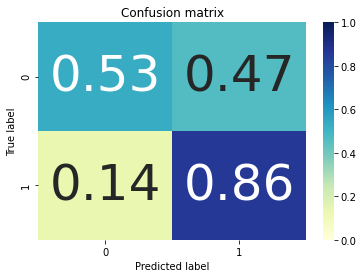

In [36]:

# Visualizing cm

cm = confusion_matrix(y, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = xgb_cl.classes_, title='Confusion matrix')

Hyperparameter Tuning to select the optimum model

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
estimator=xgb.XGBClassifier()
# define cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(estimator, X1, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean AUROC: %.3f' % np.mean(scores))

Mean AUROC: 0.621


In [38]:
classification= xgb.XGBClassifier(solver= 'lbfgs', penalty='l2', C= 100)

Final Model

In [39]:
warnings.filterwarnings("ignore")
classification.fit(X1, y)
print("The Training Accuracy is: ", classification.score(X1, y))
y_pred4 = classification.predict(X1)
print(confusion_matrix(y, y_pred4))
print(classification_report(y, y_pred4))

[01:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "C", "penalty", "solver" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Training Accuracy is:  0.7203015336625942
[[3529 3096]
 [1208 7555]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62      6625
           1       0.71      0.86      0.78      8763

    accuracy          

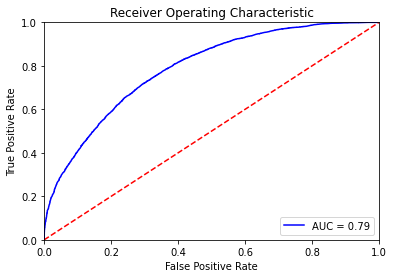

In [40]:

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classification.predict_proba(X1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Model Results on Test Set

In [41]:
test1= pd.get_dummies(test,columns = ['Final_Grade','Loan_Type','Residential_Status','Marital_Status','Gender','Employment_Status','ACCESS_Card','VISA_Card','Other_Credit_Store_Card','Age'], drop_first = True)
test1.head()

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,...,Age_68,Age_69,Age_70,Age_71,Age_72,Age_73,Age_74,Age_75,Age_76,Age_77
0,1,918,36,3000.0,14.4,46,8,132,0,288,...,0,0,0,0,0,0,0,0,0,0
1,17,840,120,10150.0,12.4,24,4,37,2,58,...,0,0,0,0,0,0,0,0,0,0
2,24,896,37,5000.0,9.4,15,3,4,0,240,...,0,0,0,0,0,0,0,0,0,0
3,44,966,48,8000.0,7.9,24,4,156,3,81,...,0,0,0,0,0,0,0,0,0,0
4,54,789,60,2000.0,27.9,21,4,15,1,15,...,0,0,0,0,0,0,0,0,0,0


In [42]:
feature_scale=[feature for feature in test1.columns if feature not in ['Ref','PPI']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(test1[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.transform(test1[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data1 = pd.concat([test[['Ref']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test1[feature_scale]), columns=feature_scale)],
                    axis=1)

In [43]:
x=data1[Z['Specs']]

In [44]:
y_prediction=classification.predict(x)

In [45]:
y_pred= pd.DataFrame(y_prediction)

In [46]:
print(y_pred)

      0
0     1
1     0
2     0
3     1
4     0
...  ..
6620  1
6621  1
6622  0
6623  1
6624  1

[6625 rows x 1 columns]


In [47]:
df=pd.DataFrame(test)
result=pd.merge(df,y_pred,how = 'left',left_index = True, right_index = True)
rslt=result.drop(['Age'],axis=1)

In [48]:
rslt.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Time_since_most_recent_outstandi,PPI,0
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,0,0,0,9,10,1,18,16,NaN,1
1,17,840,B,120,10150.0,12.4,secured,24,4,37,...,0,0,0,4,3,0,120,99,NaN,0
2,24,896,A,37,5000.0,9.4,UnSecured,15,3,4,...,0,0,0,3,20,0,16,99,NaN,0
3,44,966,X,48,8000.0,7.9,UnSecured,24,4,156,...,0,0,0,0,13,0,13,99,NaN,1
4,54,789,D,60,2000.0,27.9,UnSecured,21,4,15,...,1,1,0,8,0,0,39,99,NaN,0


In [49]:
rslt.to_csv('D:/Tiger/Important(Most).csv',index=False)